In [61]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import functional as TF
import torchvision.transforms as T
from torchvision import datasets, transforms
import numpy as np

In [62]:
#Define variables

batch_size = 32
img_height = 256
img_width = 256
img_channels = 3
train_dir = 'Spectrograms/train'
val_dir = 'Spectrograms/val'

In [ ]:
# Define the data transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example normalization values
])

# Create the ImageFolder dataset
# dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

In [64]:
import torch
from torchvision import datasets, transforms

# Define the data transformations
data_transforms = transforms.Compose([
    transforms.ToTensor()
])

# Create the ImageFolder dataset
train_dataset = datasets.ImageFolder(root=train_dir, transform=data_transforms)
# high_quality_dataset = datasets.ImageFolder(root=val_dir, transform=data_transforms)
print(type(train_dataset.imgs[0]))

# Create data loader
batch_size = 32
data_loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(train_dataset.imgs),
    batch_size=batch_size,
    shuffle=True
)

# Compute running mean and std
mean = torch.zeros(3)  # Assuming RGB images (change the size if needed)
std = torch.zeros(3)
num_samples = 0

for images, _ in data_loader:
    batch_size = images.size(0)
    images = images.view(batch_size, images.size(1), -1)

    # Compute mean and std per channel
    channel_mean = images.mean(dim=2).sum(dim=0)
    channel_std = images.std(dim=2).sum(dim=0)

    mean += channel_mean
    std += channel_std
    num_samples += batch_size
    break

mean /= num_samples
std /= num_samples

print("Mean:", mean)
print("Std:", std)

[('Spectrograms/train/hq_train/079  (Original Mix)-1.png', 0), ('Spectrograms/train/hq_train/079  (Original Mix)-11.png', 0), ('Spectrograms/train/hq_train/079  (Original Mix)-13.png', 0), ('Spectrograms/train/hq_train/079  (Original Mix)-16.png', 0), ('Spectrograms/train/hq_train/079  (Original Mix)-2.png', 0), ('Spectrograms/train/hq_train/079  (Original Mix)-3.png', 0), ('Spectrograms/train/hq_train/079  (Original Mix)-5.png', 0), ('Spectrograms/train/hq_train/079  (Original Mix)-6.png', 0), ('Spectrograms/train/hq_train/079  (Original Mix)-8.png', 0), ('Spectrograms/train/hq_train/079  (Original Mix)-9.png', 0), ('Spectrograms/train/hq_train/11219251_Le_Freak_(Oliver_Helden_s_Extended_Mix)-1.png', 0), ('Spectrograms/train/hq_train/11219251_Le_Freak_(Oliver_Helden_s_Extended_Mix)-10.png', 0), ('Spectrograms/train/hq_train/11219251_Le_Freak_(Oliver_Helden_s_Extended_Mix)-11.png', 0), ('Spectrograms/train/hq_train/11219251_Le_Freak_(Oliver_Helden_s_Extended_Mix)-12.png', 0), ('Spectro

AttributeError: 'list' object has no attribute 'size'

Text(0.5, 1.0, 'distribution of pixels')

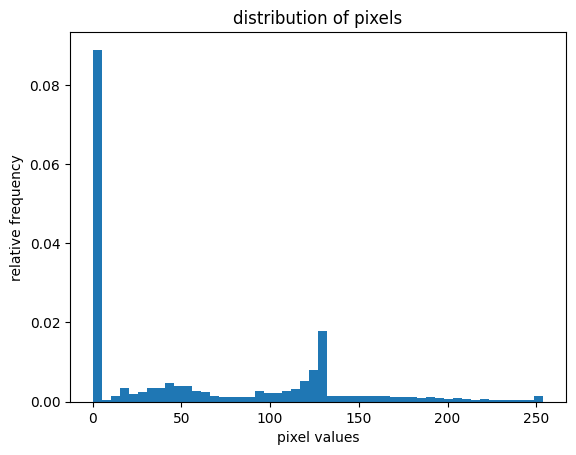

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
 
# load the image
img_path = data_dir + '/Sam Smith - Unholy (Space Ducks Remix)-8.png'
img = Image.open(img_path).convert('RGB')
 
# convert PIL image to numpy array
img_np = np.array(img)
 
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")


([], [])

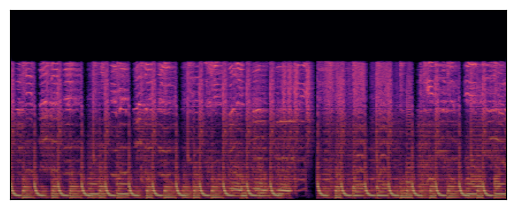

In [23]:
plt.imshow(img_np)
plt.xticks([])
plt.yticks([])

torch.Size([3, 2220, 5820])
(3, 256, 256)


Text(0.5, 1.0, 'distribution of pixels')

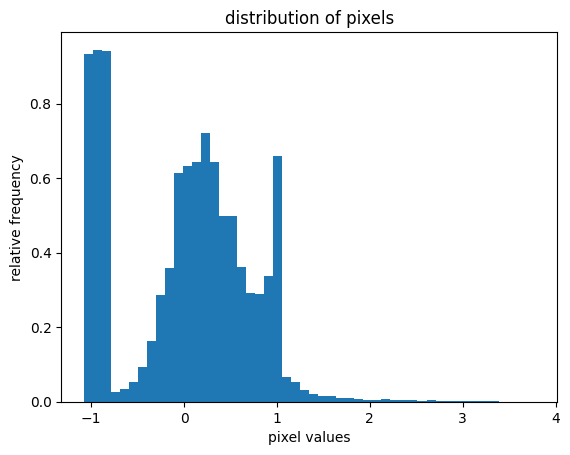

In [47]:
imgTensor = T.ToTensor()(img)
mean, std = imgTensor.mean([1,2]), imgTensor.std([1,2])

# Define the data transformations
data_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))  # Example normalization values
    transforms.Normalize(mean=mean, std=std)
])

# get normalized image
print(imgTensor.shape)
img_normalized = data_transforms(img)
 
# convert normalized image to numpy
# array
img_np = np.array(img_normalized)
print(img_np.shape)
 
# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


([], [])

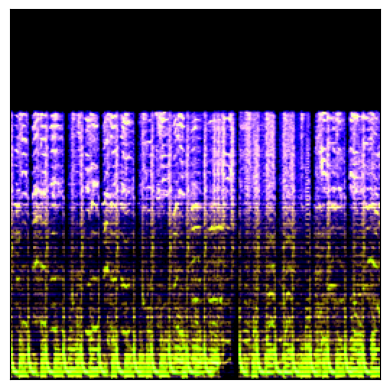

In [48]:
plt.imshow(img_np.transpose((1,2,0)))
plt.xticks([])
plt.yticks([])